In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [2]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [3]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,0.579284,-1.338940,-1.639645,-1.865569,-3.076278,1
1,-0.547755,-0.611236,0.809673,0.811142,-1.481183,0
2,0.115020,-2.493610,-1.043086,-1.364874,-2.122866,1
3,0.436316,-1.210064,-1.289866,-1.876680,-1.754645,1
4,-0.122410,-1.667413,0.139627,1.444536,-0.352812,0


In [4]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [17]:
import random

def sample_features(df, percent):
    cols = random.sample(df.columns.tolist()[:-1], int(percent * (df.shape[1] - 1)))
    new_df = df[cols].copy()  # Create a copy to avoid SettingWithCopyWarning
    new_df['target'] = df['target']  # Ensure 'target' exists in df
    return new_df

In [18]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [19]:
df1 = combined_sampling(df,0.5,0.5)

In [20]:
df2 = combined_sampling(df,0.5,0.5)

In [21]:
df3 = combined_sampling(df,0.5,0.5)

In [22]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col3', 'col4', 'target'], dtype='object')
Index(['col4', 'col5', 'target'], dtype='object')
Index(['col5', 'col1', 'target'], dtype='object')


In [23]:
df3

,col5,col1,target
41,-0.059591,0.610745,0
70,-3.099219,0.184741,1
50,-2.377400,2.114712,1
82,-3.114839,2.176193,1
90,-0.698312,-0.087868,1
84,3.682372,3.034244,1
66,-1.511353,0.349721,1
99,0.093506,0.914193,1
72,1.734912,1.899543,1
8,-1.542577,0.413067,1


In [24]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [25]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [26]:
from sklearn.tree import plot_tree

[Text(0.5769230769230769, 0.9, 'x[0] <= 0.506\ngini = 0.471\nsamples = 50\nvalue = [19, 31]'),
 Text(0.3076923076923077, 0.7, 'x[1] <= 0.079\ngini = 0.18\nsamples = 30\nvalue = [3, 27]'),
 Text(0.15384615384615385, 0.5, 'x[1] <= -0.199\ngini = 0.071\nsamples = 27\nvalue = [1, 26]'),
 Text(0.07692307692307693, 0.3, 'gini = 0.0\nsamples = 23\nvalue = [0, 23]'),
 Text(0.23076923076923078, 0.3, 'x[1] <= -0.108\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.15384615384615385, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3076923076923077, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.46153846153846156, 0.5, 'x[0] <= 0.186\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.38461538461538464, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.5384615384615384, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8461538461538461, 0.7, 'x[1] <= 1.408\ngini = 0.32\nsamples = 20\nvalue = [16, 4]'),
 Text(0.7692307692307693, 0.5, 'x[0] <= 1.06\ngini = 0.1

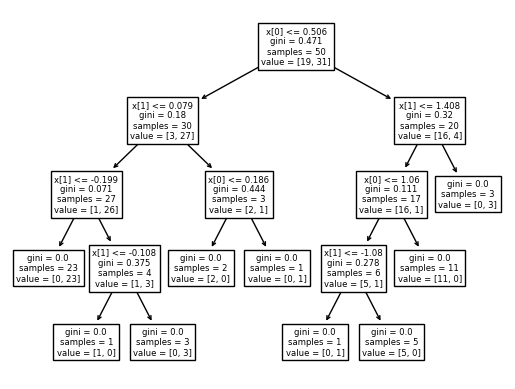

In [27]:
plot_tree(clf1)

[Text(0.38461538461538464, 0.95, 'x[1] <= 2.925\ngini = 0.497\nsamples = 50\nvalue = [27, 23]'),
 Text(0.3076923076923077, 0.85, 'x[0] <= -2.853\ngini = 0.48\nsamples = 45\nvalue = [27, 18]'),
 Text(0.23076923076923078, 0.75, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.38461538461538464, 0.75, 'x[0] <= -1.817\ngini = 0.495\nsamples = 40\nvalue = [22, 18]'),
 Text(0.23076923076923078, 0.65, 'x[0] <= -2.262\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.15384615384615385, 0.55, 'x[0] <= -2.526\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.07692307692307693, 0.45, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.23076923076923078, 0.45, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3076923076923077, 0.55, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.5384615384615384, 0.65, 'x[1] <= -2.712\ngini = 0.463\nsamples = 33\nvalue = [21, 12]'),
 Text(0.46153846153846156, 0.55, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6153846153846154, 0.55, 'x[1] <=

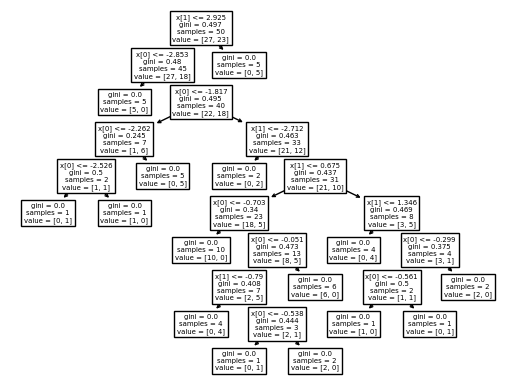

In [28]:
plot_tree(clf2)

[Text(0.3333333333333333, 0.9166666666666666, 'x[1] <= -0.819\ngini = 0.449\nsamples = 50\nvalue = [17, 33]'),
 Text(0.16666666666666666, 0.75, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.5, 0.75, 'x[0] <= -0.948\ngini = 0.193\nsamples = 37\nvalue = [4, 33]'),
 Text(0.3333333333333333, 0.5833333333333334, 'gini = 0.0\nsamples = 21\nvalue = [0, 21]'),
 Text(0.6666666666666666, 0.5833333333333334, 'x[1] <= 0.762\ngini = 0.375\nsamples = 16\nvalue = [4, 12]'),
 Text(0.5, 0.4166666666666667, 'x[1] <= 0.09\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.3333333333333333, 0.25, 'x[0] <= 0.519\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.16666666666666666, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.5, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8333333333333334, 0.4166666666666667, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]')]

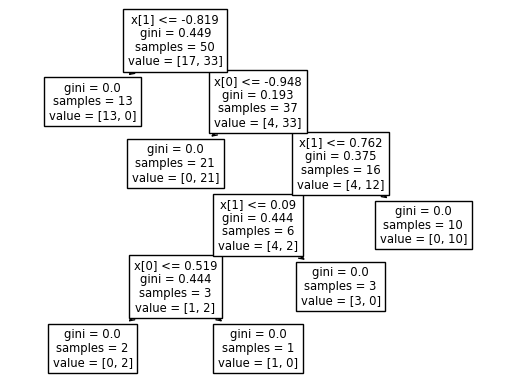

In [29]:
plot_tree(clf3)

In [30]:
clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [31]:
clf2.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [32]:
clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [33]:
df.sample(14,replace=True)

,col1,col2,col3,col4,col5,target
18,0.809604,-2.855705,-1.762945,-2.419462,0.378819,1
76,1.719762,-2.497339,-2.424309,-2.221504,-0.426239,1
76,1.719762,-2.497339,-2.424309,-2.221504,-0.426239,1
7,1.467514,1.607744,0.483604,0.040795,-3.984148,1
95,-0.165019,-1.130481,-0.352665,-0.127074,-1.968368,1
67,-0.896926,-1.798476,0.528562,-0.851870,-0.666792,0
90,-0.087868,-1.911270,-1.915514,-0.439858,-0.698312,1
12,-2.812781,0.503907,3.240275,-2.924109,-1.668832,0
34,-0.826774,-1.220822,0.620126,0.708603,2.237019,0
42,1.619413,0.186871,-0.212495,-0.940491,0.901030,1
